#### INF2604 – Computational Geometry
### Work I - Convex hull

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
_EPS = 1**-9
INF = 2048

class point(object):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.mag = self.magnitude()
        
    def dist(self, p):
        return np.sqrt(np.power((p.x - self.x), 2) + np.power((p.y - self.y), 2))
    
    def is_in(self, circle):
        d = self.dist(circle.c)

        if d <= circle.r: # considering p inside circle when p is on circle
            return True
        else:
            return False

    def collinear(self, pi, pj):
        m = np.array([
                        [1, self.x, self.y],
                        [1, pi.x, pi.y],
                        [1, pj.x, pj.y]
                     ])
        m_det = np.linalg.det(m)
        return np.fabs(m_det) <= _EPS
    
    def minus(self, p):
        return point(self.x - p.x, self.y - p.y)
    
    def plus(self, p):
        return point(self.x + p.x, self.y + p.y)
    
    def scalar_mult(self, alpha):
        return point(self.x * alpha, self.y * alpha)
    
    def magnitude(self):
        return np.sqrt(self.x * self.x + self.y * self.y)
    
    def normalization(self):
        m = self.magnitude()
        return point(self.x / m, self.y / m)
    
    def equal(self, p):
        return self.x == p.x and self.y == p.y
    
    def angle(self, p):
        length1 = np.sqrt(self.x * self.x + self.y * self.y)
        length2 = np.sqrt(p.x * p.x + p.y * p.y)
        return np.arccos((self.x * p.x + self.y * p.y)/ (length1 * length2))

In [3]:
class segment(object):
    def __init__(self, p, q):
        self.p = p
        self.q = q
    
    def angle(self):
        return np.arctan2([self.p.x], [self.q.x])[0]

### Set with fecho1.txt points

In [4]:
points_1 = list()

filename = 'fecho1.txt'

with open(filename, 'r') as f:
    for line in f:
        line = line.split()
        points_1.append(point(float(line[0]), float(line[1])))
        
points_2 = list()

filename = 'fecho2.txt'

with open(filename, 'r') as f:
    for line in f:
        line = line.split()
        points_2.append(point(float(line[0]), float(line[1])))

### Point cloud example (fecho1.txt)

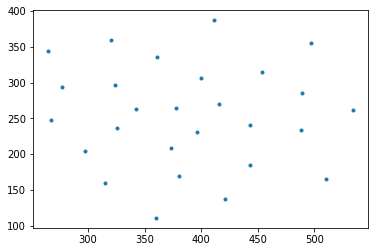

In [5]:
plt.scatter([p.x for p in points_1], [p.y for p in points_1], marker='.')
plt.show()

### Auxiliary functions

In [6]:
# lowest point
def lowest_point(points):
    ymin = INF
    idx = 0
    for i in range(len(points)):
        p = points[i]
        if p.y <= ymin:
            ymin = p.y
            idx = i
    
    return idx

In [7]:
def orientation(p, q, r):
    m_pqr = np.array([
            [1, p.x, p.y],
            [1, q.x, q.y],
            [1, r.x, r.y]
         ])
    
    m_pqr_det = np.linalg.det(m_pqr)
    
    if m_pqr_det == 0: # colinear
        return 0
    elif m_pqr_det > 0: # clockwise
        return 1
    else: # counter-clockwise
        return 2        

### Gift wrapping algorithm

Time complexity: $O(nh)$ where $h$ is the number of points on hull

In [8]:
def convex_hull(points):
    n = len(points)
    hull = list()
    
    # initial point
    l_idx = lowest_point(points)

    p_idx = l_idx
    
    while True:
        hull.append(points[p_idx])
        q_idx = (p_idx + 1) % n
        
        for r_idx in range(n):
            # if r is more counterclockwise than current q, q is updated
            if r_idx != p_idx and r_idx != p_idx:
                if orientation(points[p_idx], points[r_idx], points[q_idx]) == 2:
                    q_idx = r_idx
        
        # q will be added on hull in next iteration
        p_idx = q_idx
        
        # once p is equal to initial points, the algorithm is over
        if p_idx == l_idx:
            break
    
    return hull

In [9]:
ch_ans_1 = convex_hull(points_1)
ch_ans_2 = convex_hull(points_2)

### Solution for first set of points

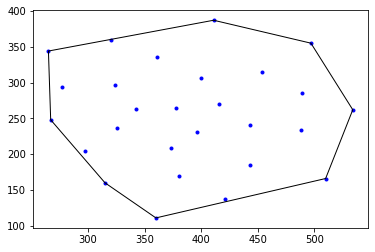

In [10]:
fig, ax = plt.subplots()
ax.scatter([p.x for p in points_1], [p.y for p in points_1], marker='.', color='blue')
hull_polygon = plt.Polygon(np.array([[p.x, p.y] for p in ch_ans_1]), edgecolor='black', facecolor='none')
ax.add_artist(hull_polygon)

plt.show()

### Solution for second set of points

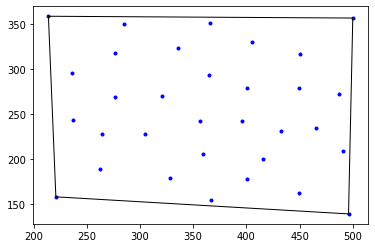

In [11]:
fig, ax = plt.subplots()
ax.scatter([p.x for p in points_2], [p.y for p in points_2], marker='.', color='blue')
hull_polygon = plt.Polygon(np.array([[p.x, p.y] for p in ch_ans_2]), edgecolor='black', facecolor='none')
ax.add_artist(hull_polygon)

plt.show()

In [12]:
def generate_random_points(n, minx = 0, maxx = 400, miny = 0, maxy = 400):
    points = list()
    
    for i in range(n):
        x, y = np.random.randint(minx, maxx), np.random.randint(miny, maxy)
        points.append(point(x, y))
    
    return points

### Solution for a set of randomly generated points

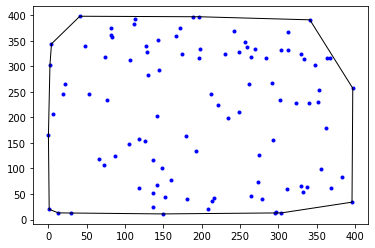

In [13]:
points_3 = generate_random_points(100) # 100 points on cloud
ch_ans_3 = convex_hull(points_3)

fig, ax = plt.subplots()
ax.scatter([p.x for p in points_3], [p.y for p in points_3], marker='.', color='blue')
hull_polygon = plt.Polygon(np.array([[p.x, p.y] for p in ch_ans_3]), edgecolor='black', facecolor='none')
ax.add_artist(hull_polygon)

plt.show()

### Write outputfile

In [14]:
def export_solution(points, solution, filename):
    with open(filename, 'w') as f:
        for v in solution:
            vi = points.index(v)
            f.write('{}\n'.format(vi))

In [15]:
export_solution(points_1, ch_ans_1, 'nuvem1.txt')
export_solution(points_2, ch_ans_2, 'nuvem2.txt')